In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os as os
import math
import shutil
import glob

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
pip install split-folders

In [9]:
import splitfolders

In [10]:
inputfile = '/content/drive/MyDrive/Colab Notebooks/newdataset'
outputfile = '/content/drive/MyDrive/Colab Notebooks/newdataset split'

In [ ]:
splitfolders.ratio(inputfile,
                   output = outputfile,
                   seed = 38,
                   ratio = (0.7, 0.2, 0.1),
                   group_prefix = None)

Copying files: 1473 files [06:37,  3.71 files/s]


In [11]:
data="/content/drive/MyDrive/Colab Notebooks/newdataset split"
number_of_images={}
for dir in os.listdir(data):
  number_of_images[dir]=len(os.listdir(os.path.join(data,dir)))

In [12]:
number_of_images.items()

dict_items([('train', 2), ('val', 2), ('test', 2)])

In [6]:
import keras
print(keras.__version__)

2.15.0


In [7]:
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D


In [8]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3), padding='same'))
model.add(Conv2D(filters=36, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(GlobalAvgPool2D())
model.add(Dropout(rate=0.25))

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 36)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 109, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [13]:
train_data = ImageDataGenerator(rescale = 1./255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True)

test_data  = ImageDataGenerator(rescale = 1./255)

validate_data = ImageDataGenerator(rescale = 1./255)

In [14]:
train_dataset  = train_data.flow_from_directory (directory = '/content/drive/MyDrive/Colab Notebooks/newdataset split/train',
                                                  target_size = (244,244),
                                                  class_mode = 'binary',
                                                  batch_size = 32)

Found 1841 images belonging to 2 classes.


In [15]:
test_dataset = test_data.flow_from_directory (directory = '/content/drive/MyDrive/Colab Notebooks/newdataset split/test',
                                              target_size = (244,244),
                                              class_mode = 'binary',
                                              batch_size = 32)

Found 563 images belonging to 2 classes.


In [16]:
validate_dataset = validate_data.flow_from_directory (directory = '/content/drive/MyDrive/Colab Notebooks/newdataset split/val',
                                                      target_size = (244,244),
                                                      class_mode = 'binary',
                                                      batch_size = 32)

Found 703 images belonging to 2 classes.


In [17]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

es=EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=12,verbose=1,mode='auto')

mc=ModelCheckpoint(monitor="val_accuracy",filepath="./bestmodel.keras",verbose=1,save_best=True,save_format='h5',mode='auto')

cd=[es,mc]

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
hs=model.fit(train_dataset,
                       steps_per_epoch=8,
                       epochs=20,
                       verbose=1,
                       validation_data=validate_dataset,
                       validation_steps=8,
                       callbacks=cd)

Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.6636 - accuracy: 0.6797
Epoch 1: saving model to ./bestmodel.keras
8/8 [==============================] - 235s 31s/step - loss: 0.6636 - accuracy: 0.6797 - val_loss: 0.6495 - val_accuracy: 0.6914
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.6360 - accuracy: 0.7344
Epoch 2: saving model to ./bestmodel.keras
8/8 [==============================] - 147s 19s/step - loss: 0.6360 - accuracy: 0.7344 - val_loss: 0.6677 - val_accuracy: 0.6719
Epoch 3/20
8/8 [==============================] - ETA: 0s - loss: 0.6566 - accuracy: 0.6722
Epoch 3: saving model to ./bestmodel.keras
8/8 [==============================] - 103s 13s/step - loss: 0.6566 - accuracy: 0.6722 - val_loss: 0.6525 - val_accuracy: 0.6836
Epoch 4/20
8/8 [==============================] - ETA: 0s - loss: 0.6368 - accuracy: 0.7303
Epoch 4: saving model to ./bestmodel.keras
8/8 [==============================] - 107s 13s/step - loss: 0.6368 - acc

In [20]:
!ls "/content"

bestmodel.keras  drive	sample_data


In [21]:
import os

file_path = "/content/bestmodel.h5"

if os.path.isfile(file_path):
    print(f"The file '{file_path}' exists at the following location:")
    print(os.path.abspath(file_path))
else:
    print(f"The file '{file_path}' does not exist.")

The file '/content/bestmodel.h5' does not exist.


In [22]:
from keras.models import load_model

model.save('/content/bestmodel.keras')
model = keras.models.load_model('/content/bestmodel.keras')

In [23]:
hs = {'loss': 0, 'accuracy': 0, 'val_loss': 0, 'val_accuracy': 0}
keys = hs.keys()
print(keys)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [24]:
model.evaluate(test_dataset, verbose=1)

18/18 [==============================] - 209s 12s/step - loss: 0.3172 - accuracy: 0.7975


[0.3172215521335602, 0.7975133061408997]

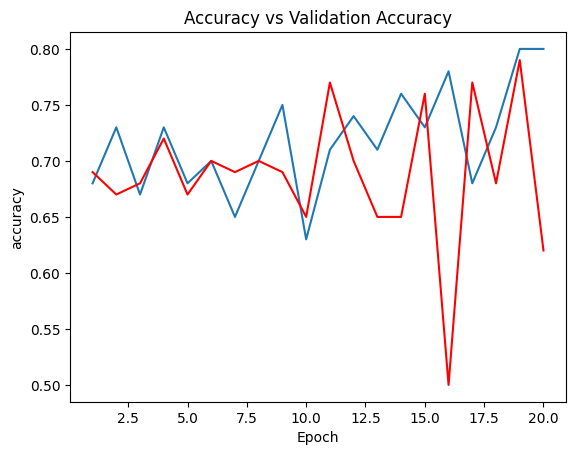

In [41]:
import matplotlib.pyplot as plt

hs={'accuracy' : [0.68, 0.73, 0.67, 0.73, 0.68, 0.70, 0.65, 0.70, 0.75, 0.63, 0.71, 0.74, 0.71, 0.76, 0.73, 0.78, 0.68, 0.73, 0.80, 0.80],
  'val_accuracy': [0.69, 0.67, 0.68, 0.72, 0.67, 0.70, 0.69, 0.70, 0.69, 0.65, 0.77, 0.70, 0.65, 0.65, 0.76, 0.50, 0.77, 0.68, 0.79, 0.62]}

epochs = list(range(1, 21))

plt.plot(epochs, hs['accuracy'])
plt.plot(epochs, hs['val_accuracy'], c='red')

plt.xlabel('Epoch')
plt.ylabel('accuracy')

plt.title('Accuracy vs Validation Accuracy')
plt.show()

In [37]:
print(hs)

{'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}


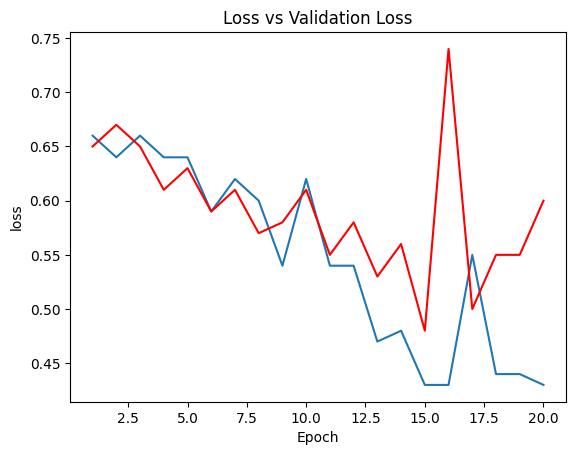

In [42]:
import matplotlib.pyplot as plt

hs={'loss' : [0.66, 0.64, 0.66, 0.64, 0.64, 0.59, 0.62, 0.60, 0.54, 0.62, 0.54, 0.54, 0.47, 0.48, 0.43, 0.43, 0.55, 0.44, 0.44, 0.43],
  'val_loss': [0.65, 0.67, 0.65, 0.61, 0.63, 0.59, 0.61, 0.57, 0.58, 0.61, 0.55, 0.58, 0.53, 0.56, 0.48, 0.74, 0.50, 0.55, 0.55, 0.60]}

epochs = list(range(1, 21))

plt.plot(epochs, hs['loss'])
plt.plot(epochs, hs['val_loss'], c='red')

plt.xlabel('Epoch')
plt.ylabel('loss')

plt.title('Loss vs Validation Loss')
plt.show()

In [43]:
accuracy=model.evaluate(test_dataset)[1]

print(f"Accuracy of the model is {accuracy*100}% ")

18/18 [==============================] - 41s 2s/step - loss: 0.3172 - accuracy: 0.7975
Accuracy of the model is 79.75133061408997% 


In [44]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [45]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

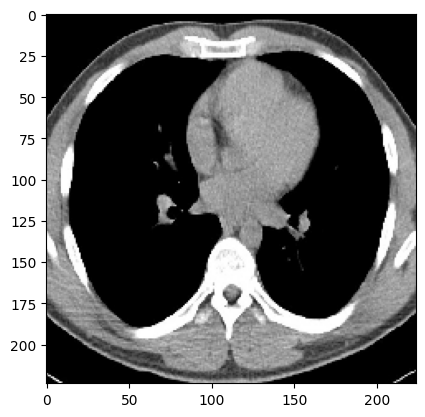

1/1 [==============================] - 0s 74ms/step
Image has non-cancerous cells.


In [47]:
path="/content/drive/MyDrive/Colab Notebooks/newdataset split/test/Non-cancerous/12.png"

image = load_img(path,
                  target_size=(224,224))

input_arr=img_to_array(image)/255

plt.imshow(input_arr)
plt.show()

# Expand dimensions to match the input shape of your model
input_arr = np.expand_dims(input_arr, axis=0)

# Make predictions
predictions = model.predict(input_arr)

# Assuming class 0 corresponds to "Tumour" and class 1 corresponds to "No Tumour"
if predictions[0][0] >= 0.5:
    print("Image has non-cancerous cells.")
else:
    print("Image has cancerous cells.")

In [48]:
train_dataset.class_indices
{'Non-cancerous':0,"Cancerous":1}

{'Non-cancerous': 0, 'Cancerous': 1}

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the trained model
model_path = "/content/bestmodel.keras"  # Replace with the path to your model
model = load_model(model_path)

# Load the test data using an ImageDataGenerator
test_data  = ImageDataGenerator(rescale = 1./255)

test_dataset = test_data.flow_from_directory (directory = '/content/drive/MyDrive/Colab Notebooks/newdataset split/test',
                                              target_size = (244,244),
                                              class_mode = 'binary',
                                              batch_size = 32)

# Make predictions on the test data
y_true = test_dataset.classes
y_pred = (model.predict(test_dataset) > 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
confusion_mat = confusion_matrix(y_true, y_pred)
classification_rep = classification_report(y_true, y_pred, target_names=test_dataset.class_indices.keys())

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

Found 563 images belonging to 2 classes.
18/18 [==============================] - 51s 3s/step
Accuracy: 0.5417406749555951
Precision: 0.2647058823529412
Recall: 0.4315068493150685
F1-Score: 0.328125
Confusion Matrix:
 [[242 175]
 [ 83  63]]
Classification Report:
                precision    recall  f1-score   support

    Cancerous       0.74      0.58      0.65       417
Non-cancerous       0.26      0.43      0.33       146

     accuracy                           0.54       563
    macro avg       0.50      0.51      0.49       563
 weighted avg       0.62      0.54      0.57       563

